# System Threat Forecaster: Predicting Security Threats

## Project Overview
This project aims to predict potential security threats to computer systems based on their configuration, software, and usage patterns. By analyzing various system attributes, we can identify machines at risk and recommend preventive measures.



In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv



# Exploratory Data Analysis - Milestone 1

In [31]:
data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')

In [7]:
data.head(15)

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0
5,22f549ef938e3a943854d49c853ba918,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1338.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,4.0,2018-09-17 02:29:00,2018-09-11,0
6,d197d1b86b9071b50a655bb3b31cc828,win8defender,1.1.15200.1,4.18.1807.18075,1.275.182.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,0.0,11.0,2018-08-26 09:33:00,2018-08-14,0
7,8e3a7d3fe18b946443f0777060f82ab7,win8defender,1.1.15100.1,4.18.1807.18075,1.273.738.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,0.0,1.0,2018-08-02 16:51:00,2018-07-16,1
8,bdb0b0d016466c16b3c58ce39da702e1,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1498.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,0.0,1.0,2018-08-16 11:38:00,2018-07-10,0
9,44f4b3df4c9ecc13c4a8f3b61f7a18c8,win8defender,1.1.15200.1,4.18.1807.18075,1.275.36.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,1.0,1.0,2018-08-23 12:13:00,2018-07-16,1


In [8]:
data.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

In [9]:
data.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

### D

In [10]:
data.isnull().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

In [4]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['MachineID', 'ProductName', 'EngineVersion', 'AppVersion', 'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion', 'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName', 'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType', 'ChassisType', 'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallType', 'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel', 'FlightRing', 'DateAS', 'DateOS']
Numerical Columns: ['IsBetaUser', 'RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite', 'IsSystemProtected', 'AutoSampleSubmissionEnabled', 'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', '

In [5]:
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

In [11]:
### drop columns with very frequent missing values
data.dropna(axis=1, thresh=0.5 * len(data), inplace=True) 

In [6]:
data.shape

(100000, 76)

In [10]:
data.shape[-1]

76

In [15]:
df = data.copy()

In [16]:
df.dropna(axis=1,inplace=True)

In [17]:
df.shape[-1]

73

In [18]:
df.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'PowerPlatformRole',
 

In [19]:
unique_os = df['OSVersion'].nunique()
print(f"Number of unique OS versions: {unique_os}")


Number of unique OS versions: 7


In [20]:
antivirus_products = data['NumAntivirusProductsInstalled'].max()
print(f"Maximum value of NumAntivirusProductsInstalled: {antivirus_products}")

Maximum value of NumAntivirusProductsInstalled: 5.0


In [21]:
gamers_with_malware = data[(data['IsGamer'] == 1) & (data['target'] == 1)].shape[0]
print(f"Number of gamers with malware detected: {gamers_with_malware}")

Number of gamers with malware detected: 16294


In [22]:

screen_resolution_count = data[
    (data['PrimaryDisplayResolutionHorizontal'] == 1366) &
    (data['PrimaryDisplayResolutionVertical'] == 768)
].shape[0]
print(f"Number of systems with screen resolution 1366 x 768: {screen_resolution_count}")


Number of systems with screen resolution 1366 x 768: 51435


In [23]:
median_ram = data['TotalPhysicalRAMMB'].median()
print(f"50th percentile value of TotalPhysicalRAMMB: {median_ram}")


50th percentile value of TotalPhysicalRAMMB: 4096.0


In [13]:
most_frequent_protection_state = data[data['IsPassiveModeEnabled'] == 1]['RealTimeProtectionState'].mode()[0]
print(f"Most frequent RealTimeProtectionState when IsPassiveModeEnabled == 1: {most_frequent_protection_state}")


Most frequent RealTimeProtectionState when IsPassiveModeEnabled == 1: 0.0


In [14]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("Missing Values:")
print(missing_values[missing_values > 0])


Missing Values:
PrimaryDiskType    23
ChassisType         2
DateOS             24
dtype: int64


# visualisations

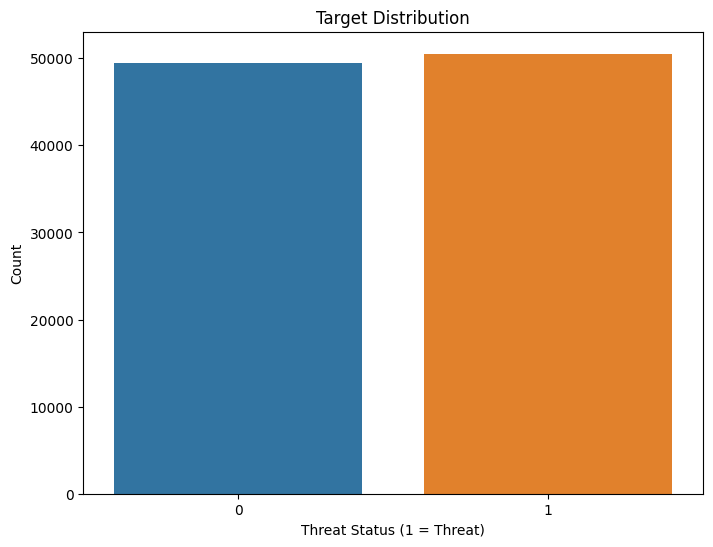

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=train)
plt.title('Target Distribution')
plt.xlabel('Threat Status (1 = Threat)')
plt.ylabel('Count')
plt.show()


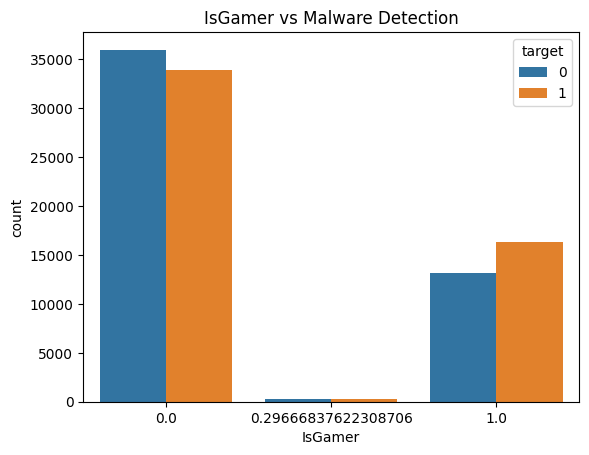

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=data, x='IsGamer', hue='target')
plt.title('IsGamer vs Malware Detection')
plt.show()


Text(0.5, 1.0, 'OS Age vs Target')

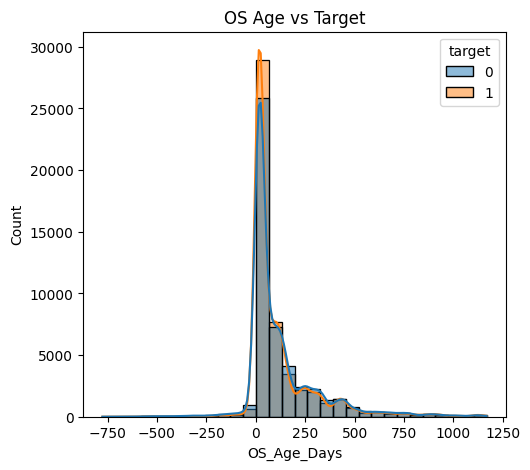

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=train, x='OS_Age_Days', hue='target', bins=30, kde=True)
plt.title('OS Age vs Target')



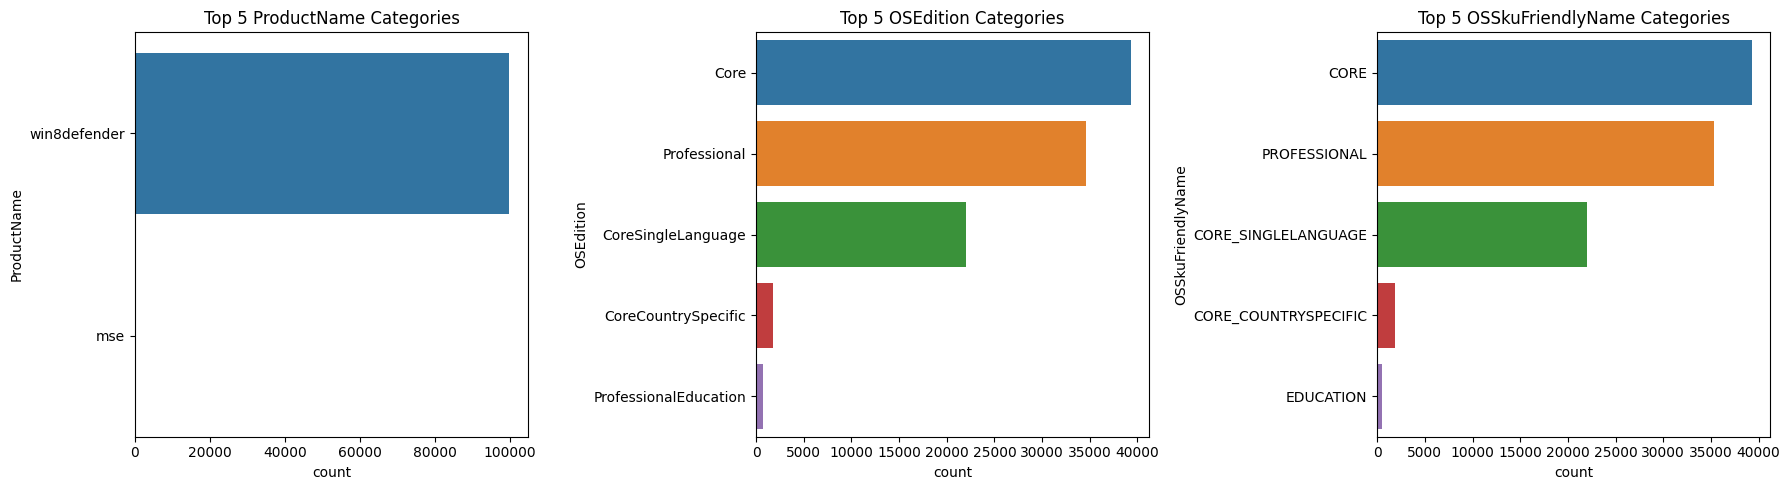

In [32]:
cat_cols = ['ProductName', 'OSEdition', 'OSSkuFriendlyName']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cat_cols):
    top_categories = data[col].value_counts().head(5).index
    sns.countplot(y=col, data=data[data[col].isin(top_categories)], ax=axes[i], order=top_categories)
    axes[i].set_title(f'Top 5 {col} Categories')
    
plt.tight_layout()
plt.show()


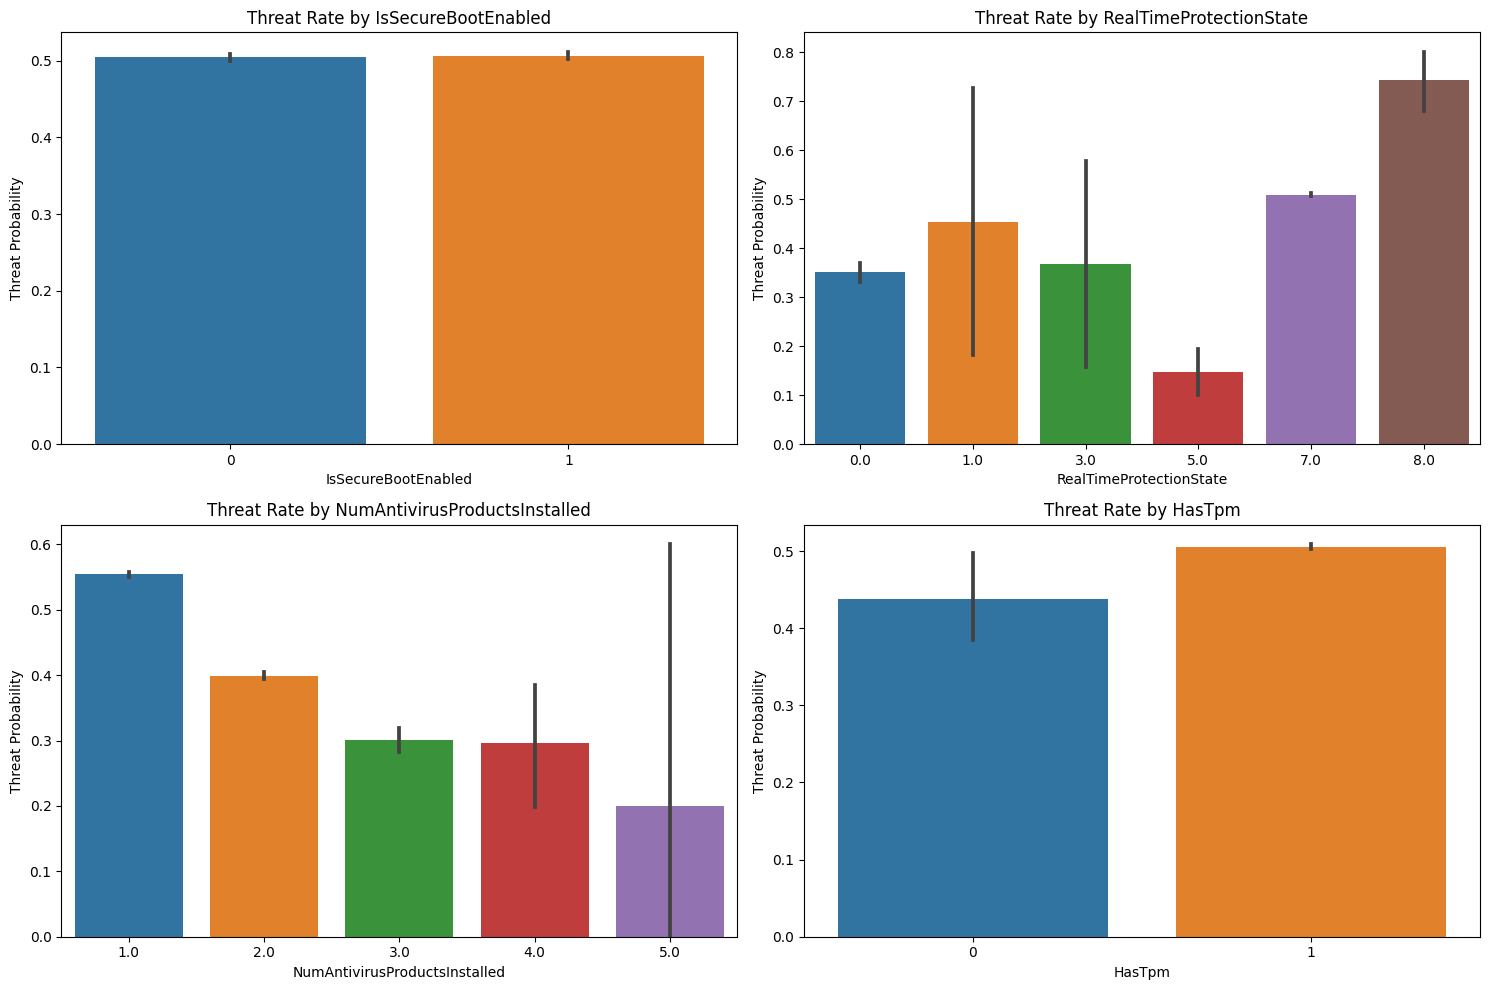

In [33]:
security_features = ['IsSecureBootEnabled', 'RealTimeProtectionState', 'NumAntivirusProductsInstalled', 'HasTpm']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(security_features):
    sns.barplot(x=feature, y='target', data=data, ax=axes[i])
    axes[i].set_title(f'Threat Rate by {feature}')
    axes[i].set_ylabel('Threat Probability')
    
plt.tight_layout()
plt.show()


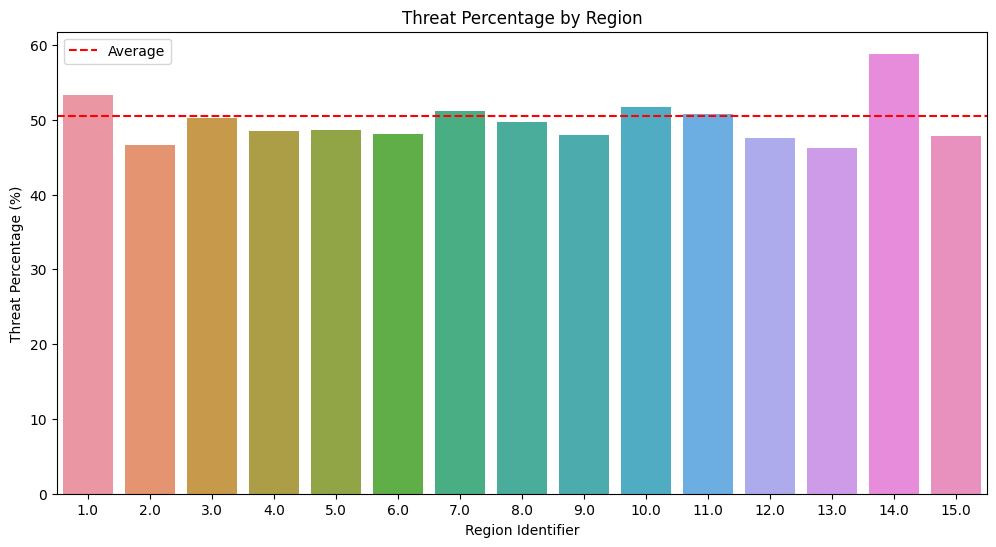

In [34]:
region_threat = data.groupby('RegionIdentifier')['target'].mean().reset_index()
region_threat['threat_percentage'] = region_threat['target'] * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='RegionIdentifier', y='threat_percentage', data=region_threat)
plt.title('Threat Percentage by Region')
plt.xlabel('Region Identifier')
plt.ylabel('Threat Percentage (%)')
plt.axhline(data['target'].mean()*100, color='red', linestyle='--', label='Average')
plt.legend()
plt.show()


# preprocessing + dummy model

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))


df_encoded = pd.concat([data, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

In [14]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split


data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DummyClassifier(strategy="most_frequent")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
submission = pd.DataFrame({
    'id': X_test.index,
    'target': y_pred
})
submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")



Submission file saved as 'submission.csv'


In [12]:
test_data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')
print(test_data.columns)

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

In [13]:
submission = pd.DataFrame({
    'id': test_data['MachineID'],  
    'target': test_pred
})

submission.to_csv('submission.csv', index=False)
print("Predictions for the test data saved as 'submission.csv'")

Predictions for the test data saved as 'submission.csv'


In [ ]:
#dummy model

X = train.drop('target',axis=1)
y = train['target']
from sklearn.dummy import DummyClassifier
model = DummyClassifier().fit(X,y)
X_test = test
y_pre = model.predict(X_test)
submission = pd.DataFrame({'id': range(X_test.shape[0]), 'target': y_pre})
submission.to_csv('submission.csv', index=False)

In [11]:
import pandas as pd

In [3]:
train_data=pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
test_data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [21]:
train_data.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

In [22]:
X = train_data.drop('target',axis=1)


In [24]:
y = train_data['target']
from sklearn.dummy import DummyClassifier
model = DummyClassifier().fit(X,y)
X_test = test_data
y_pre = model.predict(X_test)
submission = pd.DataFrame({'id': range(X_test.shape[0]), 'target': y_pre})
submission.to_csv('/kaggle/working/submission.csv', index=False)

In [25]:
output=pd.read_csv('/kaggle/working/submission.csv')

In [26]:
output.head()

,id,target
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


# Milestone 2 

* Linear Models
* Stochastic Gradient Descent
* Tune the hyperparameters of the model.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score


redundant_cols = ['IsBetaUser', 'IsPassiveModeEnabled', 'AntivirusConfigID', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled']

correlation_matrix = data.corr(numeric_only=True)

if correlation_matrix.empty:
    print("Warning: The correlation matrix is empty. No numerical columns found.")
else:
    given_pairs = [
        ('DateAS', 'SignatureVersion'),
        ('OSBuildLab', 'NumericOSVersion'),
        ('OSEdition', 'OSSkuFriendlyName'),
        ('OSProductSuite', 'OSSkuFriendlyName')
    ]
    
    valid_pairs = [(col1, col2) for col1, col2 in given_pairs if col1 in correlation_matrix.index and col2 in correlation_matrix.index]
    
    if not valid_pairs:
        print("Warning: None of the given column pairs exist in the correlation matrix.")
        highest_corr_pair = None
    else:
        given_corr = {pair: correlation_matrix.loc[pair[0], pair[1]] for pair in valid_pairs}
        highest_corr_pair = max(given_corr, key=lambda k: abs(given_corr[k]))

In [ ]:
#categorical variable conversion
cat_df = data.select_dtypes(include=['object'])

encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
small_unique_cols = [col for col in cat_df.columns if cat_df[col].nunique() <= 10]
if small_unique_cols:
    encoded_data = encoder.fit_transform(cat_df[small_unique_cols])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(small_unique_cols))
    cat_df = cat_df.drop(columns=small_unique_cols).reset_index(drop=True)
    cat_df = pd.concat([cat_df, encoded_df], axis=1)

num_columns_cat_df = cat_df.shape[1]
num_df = data.select_dtypes(include=['int64', 'float64'])
scaler = MinMaxScaler()
num_df_scaled = scaler.fit_transform(num_df)
num_sum = np.nansum(num_df_scaled)  # Use np.nansum to handle NaN values safely

X = data.drop(columns=['target'])
y = data['target']

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# sgd classifier

In [6]:
cat_cols = X_imputed.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()
X_imputed[cat_cols] = encoder.fit_transform(X_imputed[cat_cols])

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

clf = SGDClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Redundant columns: {redundant_cols}")
print(f"Highest positive correlation pair: {highest_corr_pair}")
print(f"Number of columns in cat_df: {num_columns_cat_df}")
print(f"Sum of all values in num_df: {num_sum}")
print(f"Accuracy score: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Redundant columns: ['IsBetaUser', 'IsPassiveModeEnabled', 'AntivirusConfigID', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled']
Highest positive correlation pair: None
Number of columns in cat_df: 82
Sum of all values in num_df: 1585115.7294330818
Accuracy score: 0.4951


In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numeric and categorical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove target from feature lists if present
if 'target' in numeric_cols:
    numeric_cols.remove('target')
if 'target' in categorical_cols:
    categorical_cols.remove('target')

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Prepare features and target
X = data.drop('target', axis=1)
y = data['target']


# grid search cv

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# hyperparameters
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1.0, 10.0],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}


grid_search_lr = GridSearchCV(
    logistic_pipeline, 
    param_grid_lr, 
    cv=3, 
    scoring='accuracy',
    verbose=1
)

grid_search_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation score:", grid_search_lr.best_score_)
y_pred_lr = grid_search_lr.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best cross-validation score: 0.5970499704987093
Test accuracy: 0.5961

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.52      0.56      9878
           1       0.59      0.67      0.63     10122

    accuracy                           0.60     20000
   macro avg       0.60      0.60      0.59     20000
weighted avg       0.60      0.60      0.59     20000



In [7]:
import pandas as pd
from tqdm import tqdm

# Create a DataFrame for submission with tqdm progress indicator
submission = pd.DataFrame({
    'id': tqdm(X_test.index, desc='Processing IDs'),
    'target': tqdm(y_pred_lr, desc='Processing Predictions')
})

# Save the submission DataFrame to a CSV file with tqdm progress indication
with tqdm(total=1, desc='Saving submission.csv') as pbar:
    submission.to_csv('submission.csv', index=False)
    pbar.update(1)

print("submission.csv saved successfully.")


Saving submission.csv: 100%|██████████| 1/1 [00:00<00:00, 64.82it/s]

submission.csv saved successfully.


In [16]:

sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(random_state=42))
])

param_grid_sgd = {
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber'],
    'classifier__alpha': [0.0001, 0.001, 0.01],
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__max_iter': [1000, 2000]
}

grid_search_sgd = GridSearchCV(
    sgd_pipeline, 
    param_grid_sgd, 
    cv=3, 
    scoring='accuracy',
    verbose=1
)


grid_search_sgd.fit(X_train, y_train)
print("Best parameters for SGD:", grid_search_sgd.best_params_)
print("Best cross-validation score:", grid_search_sgd.best_score_)



y_pred_sgd = grid_search_sgd.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred_sgd))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sgd))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for SGD: {'classifier__alpha': 0.001, 'classifier__loss': 'log_loss', 'classifier__max_iter': 1000, 'classifier__penalty': 'l1'}
Best cross-validation score: 0.5806875461195413
Test accuracy: 0.5413

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.85      0.65      9878
           1       0.62      0.24      0.35     10122

    accuracy                           0.54     20000
   macro avg       0.57      0.55      0.50     20000
weighted avg       0.57      0.54      0.50     20000



In [13]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cols_to_encode))

cat_df = cat_df.drop(columns=cols_to_encode).join(encoded_df)
new_num_columns = cat_df.shape[1]
print(f"New number of columns: {new_num_columns}")



New number of columns: 82


In [15]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
cols = data.select_dtypes(include=['int64','float64'])
scaler = MinMaxScaler()
num_df_s = scaler.fit_transform(num_df)
num_df_scaled = pd.DataFrame(num_df_s,columns=num_df.columns)

In [16]:
sum_values = num_df_scaled.sum().sum()

print(f"Sum of all the values in num_df: {sum_values}")

Sum of all the values in num_df: 1585115.729433082


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

X = train_data.drop('target',axis=1)
y = train_data['target']

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)


In [5]:

categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

X = train_data.drop('target', axis=1)
y = train_data['target']

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)

X_imputed = pd.DataFrame(X_imputed, columns=X.columns)


categorical_cols = X.select_dtypes(include=['object']).columns

encoder = OrdinalEncoder()
X_imputed[categorical_cols] = encoder.fit_transform(X_imputed[categorical_cols])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

train_data = ""/kaggle/input/System-Threat-Forecaster/train.csv"

X = train_data.drop('target',axis=1)
y = train_data['target']

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train)

y_pred = sgd_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on test data: {accuracy}")


Accuracy on test data: 0.5084


In [11]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
X_num = num_imputer.fit_transform(X.select_dtypes(include=['number']))


In [12]:
num_imputer = SimpleImputer(strategy='median')
X_num = pd.DataFrame(num_imputer.fit_transform(X.select_dtypes(include=['number'])), 
                     columns=X.select_dtypes(include=['number']).columns)



In [13]:
cat_imputer = SimpleImputer(strategy='most_frequent')
X_cat = pd.DataFrame(cat_imputer.fit_transform(X.select_dtypes(include=['object'])), 
                     columns=X.select_dtypes(include=['object']).columns)



In [15]:
# KNN Imputation (for numerical features)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

knn_imputer = KNNImputer(n_neighbors=5)
X_knn = pd.DataFrame(knn_imputer.fit_transform(X.select_dtypes(include=['number'])), 
                      columns=X.select_dtypes(include=['number']).columns)

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score


data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
X = data.drop('target', axis=1)
y = data['target']

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(exclude=['int64', 'float64']).columns

num_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = num_imputer.fit_transform(X[numeric_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

for col in categorical_cols:
    le = LabelEncoder()  # create a new instance for each column
    X[col] = le.fit_transform(X[col].astype(str))

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


# decision tree

In [8]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

param_grid_dt = {
    'max_depth': [20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=3, scoring='accuracy')
grid_dt.fit(X_train, y_train)
best_max_depth = grid_dt.best_params_['max_depth']
best_min_samples_split = grid_dt.best_params_['min_samples_split']
best_min_samples_leaf = grid_dt.best_params_['min_samples_leaf']
best_dt_model = grid_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Best Parameters:")
print("  max_depth:", best_max_depth)
print("  min_samples_split:", best_min_samples_split)
print("  min_samples_leaf:", best_min_samples_leaf)
print("Decision Tree Test Accuracy:", round(accuracy_dt, 2))

# --------------------


Decision Tree Best Parameters:
  max_depth: 20
  min_samples_split: 2
  min_samples_leaf: 1
Decision Tree Test Accuracy: 0.56


# adaboost

In [9]:
param_grid_ab = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [5, 10],
    'algorithm': ['SAMME']
}

ab = AdaBoostClassifier(random_state=42)

grid_ab = GridSearchCV(estimator=ab, param_grid=param_grid_ab, cv=3, scoring='accuracy')
grid_ab.fit(X_train, y_train)

best_n_estimators = grid_ab.best_params_['n_estimators']
best_learning_rate = grid_ab.best_params_['learning_rate']

# Evaluate the best AdaBoost estimator on the test set
best_ab_model = grid_ab.best_estimator_
y_pred_ab = best_ab_model.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)

print("\nAdaBoost Best Parameters:")
print("  n_estimators:", best_n_estimators)
print("  learning_rate:", best_learning_rate)
print("AdaBoost Test Accuracy:", round(accuracy_ab, 2))



AdaBoost Best Parameters:
  n_estimators: 10
  learning_rate: 5
AdaBoost Test Accuracy: 0.43


# gradient boosting

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5]
}

gb = GradientBoostingClassifier(random_state=42)
grid_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=3, scoring='accuracy')
grid_gb.fit(X_train, y_train)

best_n_estimators_gb = grid_gb.best_params_['n_estimators']
best_learning_rate_gb = grid_gb.best_params_['learning_rate']
best_max_depth_gb = grid_gb.best_params_['max_depth']
best_gb_model = grid_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("\nGradient Boosting Best Parameters:")
print("  n_estimators:", best_n_estimators_gb)
print("  learning_rate:", best_learning_rate_gb)
print("  max_depth:", best_max_depth_gb)
print("Gradient Boosting Test Accuracy:", round(accuracy_gb, 2))



Gradient Boosting Best Parameters:
  n_estimators: 100
  learning_rate: 0.1
  max_depth: 5
Gradient Boosting Test Accuracy: 0.63


In [44]:
!pip install category_encoders


In [34]:
test_data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')  

In [6]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_cat = encoder.fit_transform(X[categorical_cols])

scaler = MinMaxScaler()
X_num = scaler.fit_transform(X[numeric_cols])
X_processed = np.hstack([X_num, X_cat])
chi_selector = SelectKBest(chi2, k=15)
chi_selector.fit(X_processed, y)
chi_features = X.columns[chi_selector.get_support()]

print("Chi-squared Selected Features:", chi_features.tolist())


Chi-squared Selected Features: ['IsPassiveModeEnabled', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'Processor', 'SMode', 'HasOpticalDiskDrive', 'InternalBatteryNumberOfCharges', 'OSArchitecture', 'OSEdition', 'OSSkuFriendlyName', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer']


In [10]:
# Corrected Feature Selection Section
# 1. Filter Methods - Mutual Info
mi_selector = SelectKBest(mutual_info_classif, k=15)
mi_selector.fit(X_scaled, y)
mi_features = X.columns[mi_selector.get_support()].values  # Get feature names as array
print(f"- Mutual Info: {list(mi_features)}")  # Convert to list for printing

# 2. Filter Methods - Chi-squared (with corrected preprocessing)
# Use MinMaxScaler instead of StandardScaler for chi2
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X_scaled)
chi_selector = SelectKBest(chi2, k=15)
chi_selector.fit(X_minmax, y)
chi_features = X.columns[chi_selector.get_support()].values
print(f"- Chi-squared: {list(chi_features)}")

# 3. Wrapper Method - RFE
rfe = RFE(LogisticRegression(solver='liblinear'), n_features_to_select=15)
rfe.fit(X_scaled, y)
rfe_features = X.columns[rfe.support_].values
print(f"- RFE: {list(rfe_features)}")

# 4. Embedded Method - Lasso
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
lasso.fit(X_scaled, y)
lasso_features = X.columns[lasso.coef_[0] != 0].values
print(f"- Lasso: {list(lasso_features)}")


- Mutual Info: ['EngineVersion', 'AppVersion', 'SignatureVersion', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'Processor', 'MDC2FormFactor', 'OEMModelID', 'ProcessorModelID', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'OSEdition', 'IsGamer', 'DateAS']
- Chi-squared: ['IsPassiveModeEnabled', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'Processor', 'SMode', 'HasOpticalDiskDrive', 'InternalBatteryNumberOfCharges', 'OSArchitecture', 'OSEdition', 'OSSkuFriendlyName', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer']
- RFE: ['AntivirusConfigID', 'NumAntivirusProductsInstalled', 'Processor', 'OSProductSuite', 'IsSystemProtected', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'OSEdition', 'OSInstallLanguageID', 'OSUILocaleID', 'IsVirtualDevice', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer']
- Lasso: ['Machine

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


train = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [3]:
# Feature engineering from datetime columns
for df in [train, test]:
    # Convert date columns to datetime
    df['DateAS'] = pd.to_datetime(df['DateAS'])
    df['DateOS'] = pd.to_datetime(df['DateOS'])
    
    # Extract useful features
    df['OS_Age_Days'] = (df['DateAS'] - df['DateOS']).dt.days
    df['AS_Month'] = df['DateAS'].dt.month
    df['AS_Day'] = df['DateAS'].dt.day
    df['OS_Month'] = df['DateOS'].dt.month
    
    # Drop original date columns
    df.drop(['DateAS', 'DateOS'], axis=1, inplace=True)


In [4]:

for col in train.columns:
    if train[col].dtype == 'object':
        train[col].fillna(train[col].mode()[0], inplace=True)
        if col in test.columns:
            test[col].fillna(train[col].mode()[0], inplace=True)
    else:
        train[col].fillna(train[col].median(), inplace=True)
        if col in test.columns:
            test[col].fillna(train[col].median(), inplace=True)

cat_cols = train.select_dtypes(include=['object']).columns




In [7]:
from sklearn.preprocessing import OrdinalEncoder

# Replace LabelEncoder with OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
for col in cat_cols:
    train[col] = encoder.fit_transform(train[col].values.reshape(-1, 1))
    if col in test.columns:
        test[col] = encoder.transform(test[col].values.reshape(-1, 1))


In [8]:
for col in cat_cols:
    le = LabelEncoder()
    le.fit(train[col])
    train[col] = le.transform(train[col])
    if col in test.columns:
        # Handle unseen labels by mapping them to a special value
        test[col] = test[col].map(lambda x: x if x in le.classes_ else 'unseen')
        # Create extended classes
        extended_classes = np.append(le.classes_, 'unseen')
        le.classes_ = extended_classes
        test[col] = le.transform(test[col])


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = train.drop(['MachineID', 'target'], axis=1)
y = train['target']
X_scaled = scaler.fit_transform(X)

# Prepare test data
if 'target' in test.columns:
    test_X = test.drop(['MachineID', 'target'], axis=1)
else:
    test_X = test.drop(['MachineID'], axis=1)
test_X_scaled = scaler.transform(test_X)

In [11]:
# Feature importance with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

# Select top features
selector = SelectFromModel(rf, threshold='median')
X_selected = selector.fit_transform(X_scaled, y)
test_X_selected = selector.transform(test_X_scaled)
selected_features = X.columns[selector.get_support()]

print(f"Selected {X_selected.shape[1]} features out of {X_scaled.shape[1]}")
print("Top 10 features by importance:")
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False).head(10)
print(importances)

# Apply PCA for additional insights
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)
test_X_pca = pca.transform(test_X_scaled)

print(f"Reduced dimensions from {X_scaled.shape[1]} to {X_pca.shape[1]} with PCA")


Selected 38 features out of 76
Top 10 features by importance:
                   feature  importance
3         SignatureVersion    0.051435
12                  CityID    0.047847
38  SystemVolumeCapacityMB    0.047304
64       FirmwareVersionID    0.045903
32              OEMModelID    0.043674
35        ProcessorModelID    0.042705
72             OS_Age_Days    0.041406
11               CountryID    0.035874
74                  AS_Day    0.035638
13             GeoRegionID    0.030300
Reduced dimensions from 76 to 47 with PCA


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

gpu_params = {
    'tree_method': 'gpu_hist',
    'gpu_id': 0,
    'predictor': 'gpu_predictor'
}

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    random_state=42,
    **gpu_params
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
xgb_accuracy = accuracy_score(y_val, y_pred_xgb)

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_xgb))


XGBoost Accuracy: 0.6256

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.61      9878
           1       0.62      0.67      0.64     10122

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.62     20000
weighted avg       0.63      0.63      0.62     20000



In [17]:
import lightgbm as lgb
from lightgbm.callback import early_stopping, log_evaluation

callbacks = [
    early_stopping(50, verbose=True),
    log_evaluation(period=100) 
]

lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'device': 'gpu',
    'gpu_platform_id': 0,
    'gpu_device_id': 0
}

lgb_model = lgb.train(
    lgb_params,
    lgb_train,
    num_boost_round=500,
    valid_sets=[lgb_train, lgb_val],
    callbacks=callbacks
    # verbose_eval parameter removed
)

y_pred_lgb = np.round(lgb_model.predict(X_val))
lgb_accuracy = accuracy_score(y_val, y_pred_lgb)

print(f"\nLightGBM Accuracy: {lgb_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_lgb))


[LightGBM] [Info] Number of positive: 40403, number of negative: 39597
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4240
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 38
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 38 dense feature groups (3.05 MB) transferred to GPU in 0.004962 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505038 -> initscore=0.020151
[LightGBM] [Info] Start training from score 0.020151
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 38 dense feature groups (2.44 MB) transferred to GPU in 0.003546 secs. 0 sparse feature groups
Training until validation scores don't improve for

In [18]:
# Model 3: CatBoost with GPU
from catboost import CatBoostClassifier, Pool

cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='Accuracy',
    random_seed=42,
    task_type='GPU',
    devices='0'
)

cat_model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    verbose=100,
    early_stopping_rounds=50
)

y_pred_cat = cat_model.predict(X_val)
cat_accuracy = accuracy_score(y_val, y_pred_cat)

print(f"\nCatBoost Accuracy: {cat_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_cat))

0:	learn: 0.5962000	test: 0.6005000	best: 0.6005000 (0)	total: 15.3s	remaining: 2h 6m 55s
100:	learn: 0.6220875	test: 0.6168000	best: 0.6168500 (98)	total: 15.9s	remaining: 1m 2s
200:	learn: 0.6313500	test: 0.6230500	best: 0.6233000 (199)	total: 16.6s	remaining: 24.6s
300:	learn: 0.6397000	test: 0.6247500	best: 0.6251000 (281)	total: 17.2s	remaining: 11.4s
400:	learn: 0.6466875	test: 0.6259500	best: 0.6273500 (375)	total: 17.7s	remaining: 4.38s
bestTest = 0.62735
bestIteration = 375
Shrink model to first 376 iterations.

CatBoost Accuracy: 0.6273

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.57      0.60      9878
           1       0.62      0.69      0.65     10122

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 40403, number of negative: 39597
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4240
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 38
[LightGBM] [Info] Using requested OpenCL platform 0 device 0

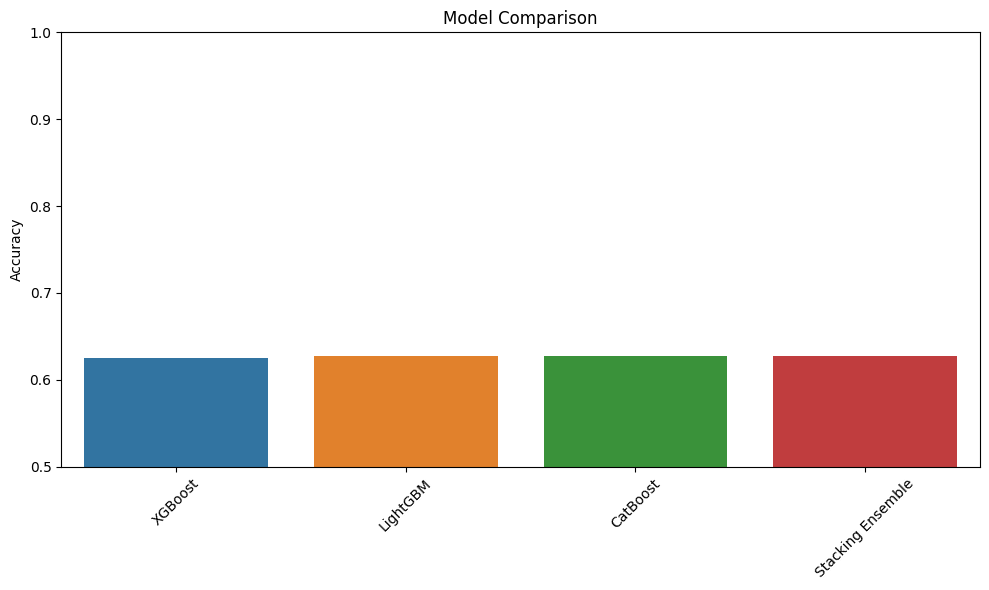

In [21]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


lgb_params_copy = lgb_params.copy()
if 'device' in lgb_params_copy:
    del lgb_params_copy['device']


base_models = [
    ('xgb', xgb_model),
    ('lgb', lgb.LGBMClassifier(device='gpu', **lgb_params_copy)),
    ('cat', cat_model)
]

meta_learner = LogisticRegression()

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5
)

stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_val)
stack_accuracy = accuracy_score(y_val, y_pred_stack)

print(f"\nStacking Ensemble Accuracy: {stack_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_stack))

models = ['XGBoost', 'LightGBM', 'CatBoost', 'Stacking Ensemble']
accuracies = [xgb_accuracy, lgb_accuracy, cat_accuracy, stack_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 40403, number of negative: 39597
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 4240
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 38
[LightGBM] [Info] Using requested OpenCL platform 0 device 0

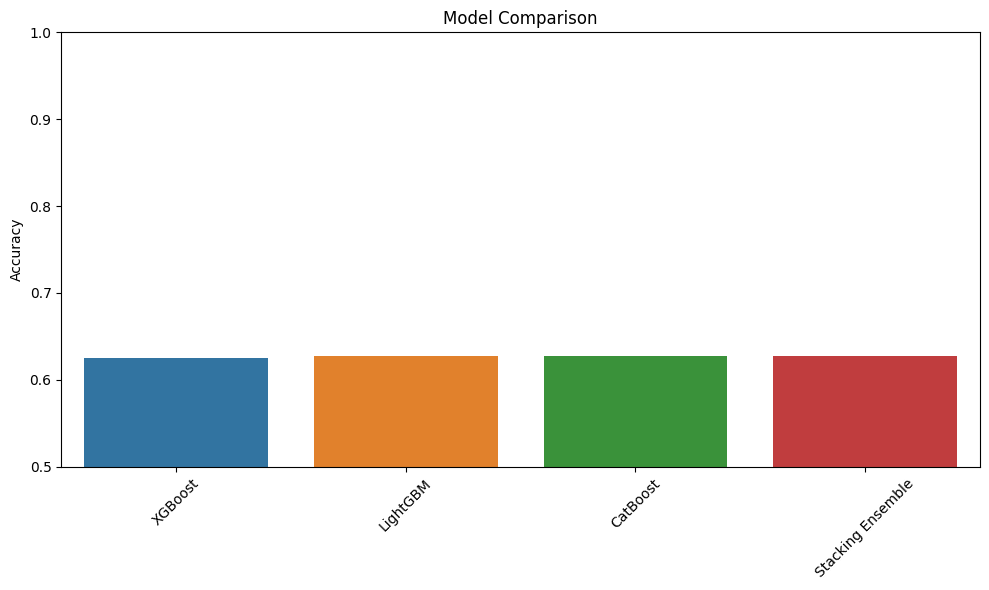

In [23]:
# Stacking ensemble
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


meta_learner = LogisticRegression()
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5
)

stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_val)
stack_accuracy = accuracy_score(y_val, y_pred_stack)

print(f"\nStacking Ensemble Accuracy: {stack_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_stack))

models = ['XGBoost', 'LightGBM', 'CatBoost', 'Stacking Ensemble']
accuracies = [xgb_accuracy, lgb_accuracy, cat_accuracy, stack_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:

best_model = stacking_model if stack_accuracy == max(accuracies) else (
    xgb_model if xgb_accuracy == max(accuracies) else (
        lgb_model if lgb_accuracy == max(accuracies) else cat_model
    )
)

if isinstance(best_model, lgb.Booster):
    final_predictions = np.round(best_model.predict(test_X_selected)).astype(int)
else:
    final_predictions = best_model.predict(test_X_selected)

submission = pd.DataFrame({
    'id': np.arange(len(final_predictions)),
    'target': final_predictions
})

submission.to_csv('final_submission.csv', index=False)
print("Final submission created with best model!")


Final submission created with best model!


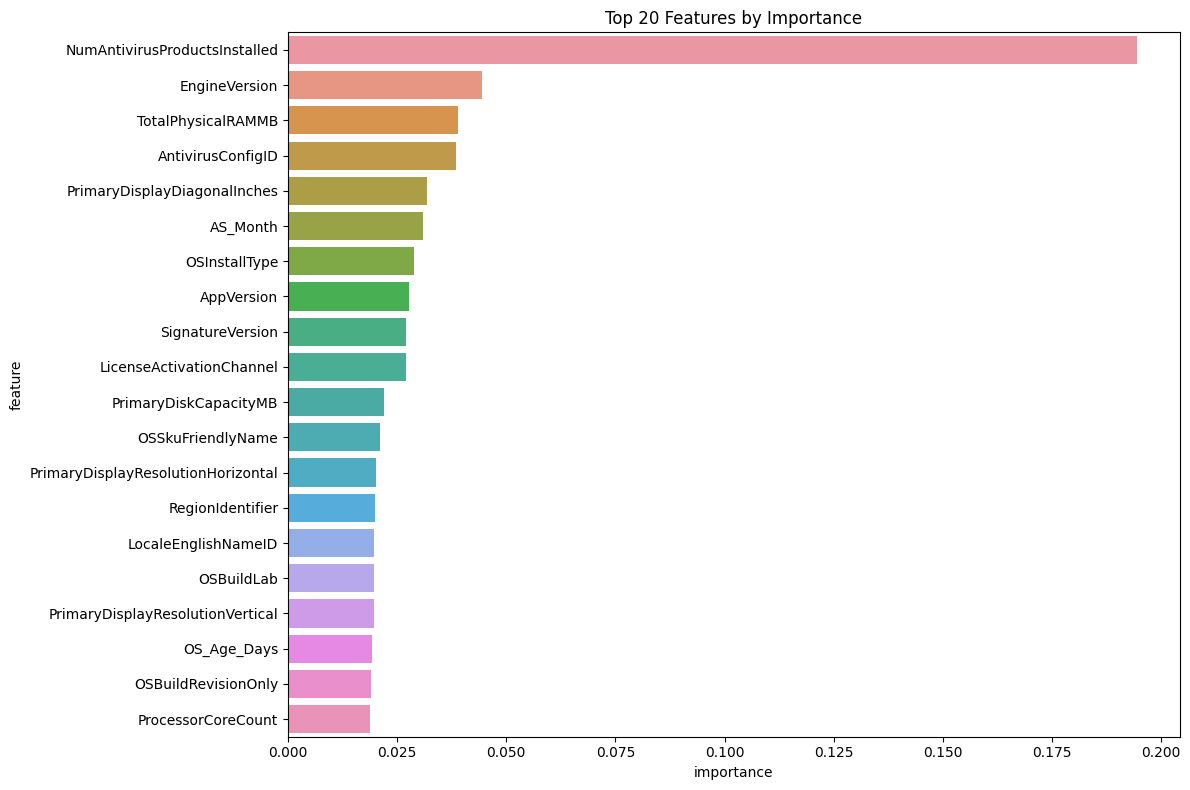

In [25]:

if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = selected_features
elif hasattr(best_model, 'coef_'):
    importances = best_model.coef_[0]
    feature_names = selected_features
else:

    importances = xgb_model.feature_importances_
    feature_names = selected_features

plt.figure(figsize=(12, 8))
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False).head(20)

sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Top 20 Features by Importance')
plt.tight_layout()
plt.show()


import shap

if isinstance(best_model, xgb.XGBClassifier):
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_val)
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_val, feature_names=selected_features, show=False)
    plt.title('SHAP Feature Importance')
    plt.tight_layout()
    plt.show()


In [35]:
import shap

if isinstance(best_model, xgb.XGBClassifier):
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_val)
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_val, feature_names=selected_features, show=False)
    plt.title('SHAP Feature Importance')
    plt.tight_layout()
    plt.show()
